# kNN Model

For this project, I have tested the performance of kNN with k = 1, 3, 5 on the training data set. It turns out it is not working really well on this data set, as the auc score is very close to 0.5 even with increasing of k, which means the predictions we get from the model is not much better than guessing. This is due to the imbalanced classes of target, this dataset has more than 96% of zeros in the targets.

In my experiment I have tried the bagging and resampling strategies to impprove my kNN model, however kNN model is not very suitable for bagging and boosting, as it is too stable when k is bigger than 1, I have tried bagging with 1-NN model however it doesn't improve much. I have compared over-sampling and under-sampling, I found out under-sampling works a little bit better than oversampling, I think that this is because the size of our data set is huge, so lossing information is better than adding noise to our modelling.

In this file, I will include my result of kNN models trainned on full train dataset and on the under-sampled train dataset. I will choose the one trainned on the under-sampling dataset as my submission model.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #for standardizing data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  roc_curve,auc, accuracy_score, confusion_matrix
from math import ceil
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score,cross_val_predict
from numba import jit
import time

In [2]:
@jit
def gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

## Import the train and test data sets.

In [3]:
train = pd.read_csv('C:/Users/nd19620/OneDrive - University of Bristol/DST/DST_Assessment1/Xinyue Guan/Data/imputetrain.csv')
test = pd.read_csv('C:/Users/nd19620/OneDrive - University of Bristol/DST/DST_Assessment1/Xinyue Guan/Data/New_test.csv')

In [4]:
(train['target']==0).sum()/train.shape[0] #percentage of zeros in our labels

0.9637216095553629

## kNN models with full train data set

In [5]:
y_train = train['target'].values
id_train = train['id'].values
X_train = train.drop(['target', 'id'], axis=1)

id_test = test['id'].values
X_test = test.drop(['target','id'], axis=1)
y_test = test['target'].values

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train=y_train.ravel()

In [6]:
scaler = StandardScaler()
scaled_train0= scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_train0, columns=X_train.columns)
scaled_test0 = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_test0, columns=X_test.columns)

In [38]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
knn_model1 = KNeighborsClassifier(n_neighbors=1)
knn_model3 = KNeighborsClassifier(n_neighbors=3)
knn_model5 = KNeighborsClassifier(n_neighbors=5)

The scores of 5-fold cross validation takes a long time to run, so I have plotted my result below. Warning: it will take long to run the scores codes below, you can choose to read the cvs file instead.

In [ ]:
scores1 = cross_val_score(knn_model1, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
scores3 = cross_val_score(knn_model3, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
scores5 = cross_val_score(knn_model5, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [27]:
scores = 
auc_full = pd.DataFrame(scores,columns=['1st_fold', '2nd_fold', '3rd_fold','4th_fold','5th_fold'])

In [28]:
auc_full = pd.read_csv('auc_full_training_set.csv')

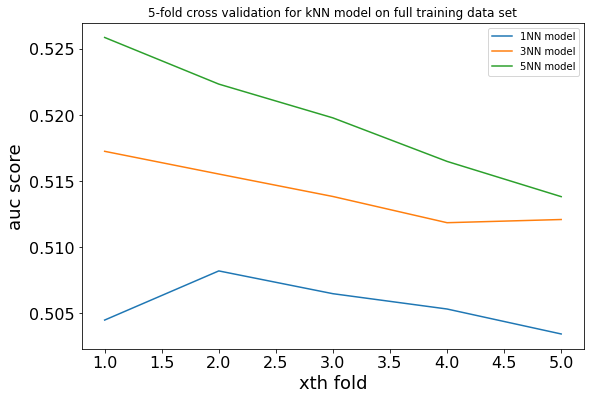

In [29]:
plt.figure(figsize=(9,6))
x = [1,2,3,4,5]
y1 = auc_full.iloc[0].ravel()
y2 = auc_full.iloc[1].ravel()
y3 = auc_full.iloc[2].ravel()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(['1NN model','3NN model','5NN model'])
plt.title ('5-fold cross validation for kNN model on full training data set')
plt.xlabel("xth fold", fontsize = 18)
plt.ylabel("auc score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

We can see that although increasing the number of k for our kNN model do improve the auc scores, but it is insignificant.

## kNN models with under sampled train set
After experimenting wiht

In [30]:
train = pd.read_csv('C:/Users/nd19620/OneDrive - University of Bristol/DST/DST_Assessment1/Xinyue Guan/Data/imputetrain.csv')
test = pd.read_csv('C:/Users/nd19620/OneDrive - University of Bristol/DST/DST_Assessment1/Xinyue Guan/Data/New_test.csv')

In [31]:
y_train = train['target'].values
id_train = train['id'].values
X_train = train.drop(['target', 'id'], axis=1)

id_test = test['id'].values
X_test = test.drop(['target','id'], axis=1)
y_test = test['target'].values

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train=y_train.ravel()

In [32]:
count_class_0, count_class_1 = train.target.value_counts()
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]

In [33]:
df_class_0_under = df_class_0.sample(count_class_1)
train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [34]:
y_train_under = train_under['target'].values
X_train_under = train_under.drop(['target', 'id'], axis=1)

X_test = test.drop(['target','id'], axis=1)
y_test = test['target'].values

X_train_under = pd.DataFrame(X_train_under)
X_test = pd.DataFrame(X_test)
y_train_under=y_train_under.ravel()

In [35]:
scaler = StandardScaler()
scaled_train0= scaler.fit_transform(X_train_under)
X_train_under = pd.DataFrame(scaled_train0, columns=X_train_under.columns)
scaled_test0 = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_test0, columns=X_test.columns)

Random under-sampling:
0    16195
1    16195
Name: target, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

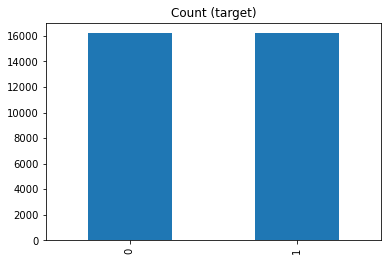

In [36]:
print('Random under-sampling:')
print(train_under.target.value_counts())

train_under.target.value_counts().plot(kind='bar', title='Count (target)')

In [39]:
scores = []
under_scores1 = cross_val_score(knn_model1, X_train_under, y_train_under, scoring='roc_auc', cv=cv, n_jobs=-1)
print(under_scores1)
scores.append(under_scores1)

[0.51636308 0.52994751 0.52176598 0.52284656 0.52439024]


In [43]:
under_scores3 = cross_val_score(knn_model3, X_train_under, y_train_under, scoring='roc_auc', cv=cv, n_jobs=-1)
print(under_scores3)
scores.append(under_scores3)

[0.53988854 0.54419804 0.54167896 0.54090945 0.5492475 ]


In [48]:
under_scores5 = cross_val_score(knn_model5, X_train_under, y_train_under, scoring='roc_auc', cv=cv, n_jobs=-1)
print(under_scores5)
scores.append(under_scores3)

[0.55381455 0.55017629 0.56112159 0.55483613 0.55879748]


In [50]:
auc_under = pd.DataFrame(scores,columns=['1st_fold', '2nd_fold', '3rd_fold','4th_fold','5th_fold'])
auc_under.to_csv('auc_under_sampled_training_set.csv', index = False)

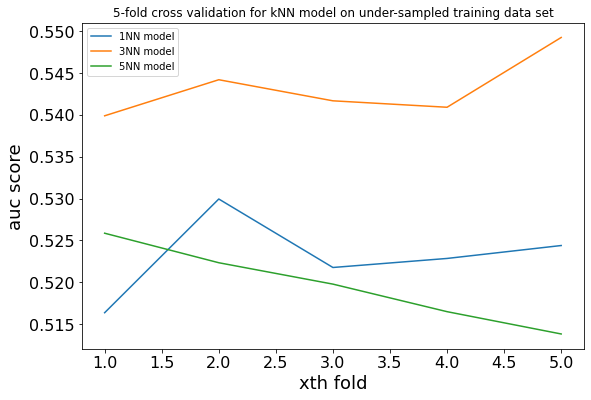

In [52]:
plt.figure(figsize=(9,6))
x = [1,2,3,4,5]
y1 = auc_under.iloc[0].ravel()
y2 = auc_under.iloc[1].ravel()
y3 = auc_full.iloc[2].ravel()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(['1NN model','3NN model','5NN model'])
plt.title ('5-fold cross validation for kNN model on under-sampled training data set')
plt.xlabel("xth fold", fontsize = 18)
plt.ylabel("auc score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

## Conclusion